Connected to Python 3.10.13

   CustomerID ProductID  Quantity      Price   TransactionDate PaymentMethod  \
0      109318         C         7  80.079844  12/26/2023 12:32          Cash   
1      993229         C         4  75.195229     8/5/2023 0:00          Cash   
2      579675         A         8  31.528816   3/11/2024 18:51          Cash   
3      799826         D         5  98.880218  10/27/2023 22:00        PayPal   
4      121413         A         7  93.188512  12/22/2023 11:38          Cash   

                                       StoreLocation ProductCategory  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354           Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483      Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...           Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142     Electronics   

   DiscountApplied(%)  TotalAmount  
0           18.677100   455.862764  
1           

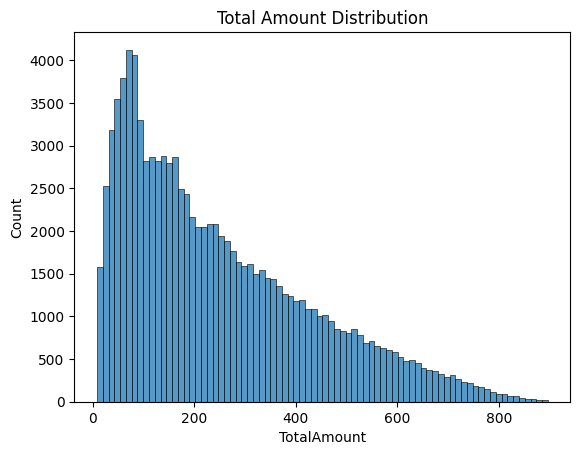

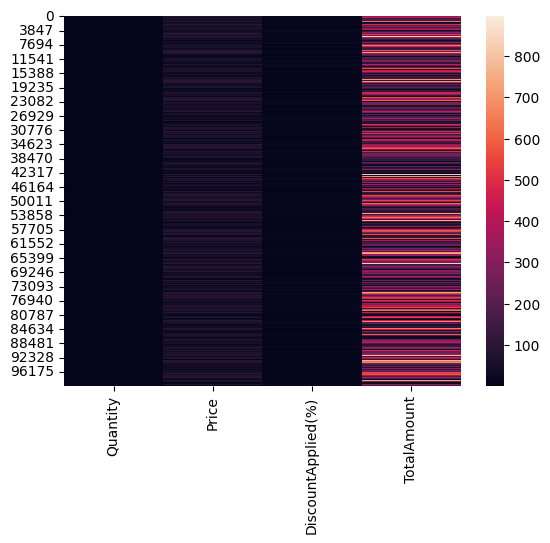

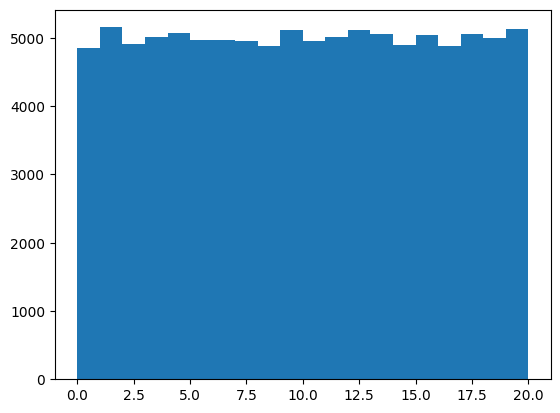

['176 Andrew Cliffs\nBaileyfort, HI 93354'
 '11635 William Well Suite 809\nEast Kara, MT 19483'
 '910 Mendez Ville Suite 909\nPort Lauraland, MO 99563' ...
 '50653 Kara Lakes\nStephanieborough, RI 94492'
 '18756 Mcfarland Way Suite 866\nBarnettside, PR 50529'
 '8046 Hull Drive\nPaulstad, GU 87218']
['Books' 'Home Decor' 'Electronics' 'Clothing']
       CustomerID ProductID  Quantity      Price   TransactionDate  \
0          109318         C         7  80.079844  12/26/2023 12:32   
1          993229         C         4  75.195229     8/5/2023 0:00   
2          579675         A         8  31.528816   3/11/2024 18:51   
3          799826         D         5  98.880218  10/27/2023 22:00   
4          121413         A         7  93.188512  12/22/2023 11:38   
...           ...       ...       ...        ...               ...   
99995      726461         A         2  56.078258   7/17/2023 16:59   
99996      328056         A         6  88.516406    5/30/2023 9:04   
99997      887304     

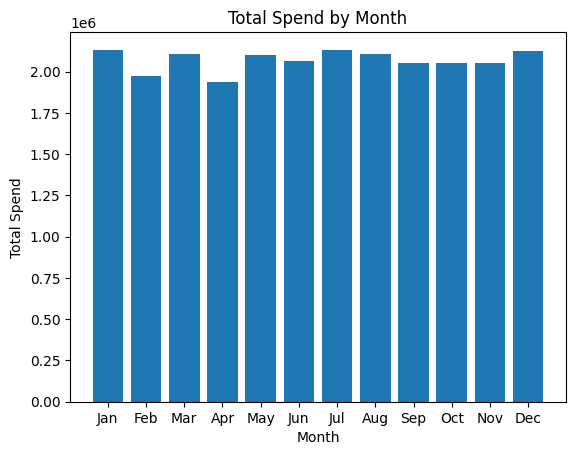

       CustomerID  Quantity      Price   TransactionDate PaymentMethod  \
0          109318         7  80.079844  12/26/2023 12:32          Cash   
1          993229         4  75.195229     8/5/2023 0:00          Cash   
2          579675         8  31.528816   3/11/2024 18:51          Cash   
3          799826         5  98.880218  10/27/2023 22:00        PayPal   
4          121413         7  93.188512  12/22/2023 11:38          Cash   
...           ...       ...        ...               ...           ...   
99995      726461         2  56.078258   7/17/2023 16:59   Credit Card   
99996      328056         6  88.516406    5/30/2023 9:04   Credit Card   
99997      887304         4  72.385564    8/25/2023 7:59   Credit Card   
99998      326401         5  66.542239    2/5/2024 19:45        PayPal   
99999      771566         5  38.087766    2/4/2024 11:53    Debit Card   

                                           StoreLocation  DiscountApplied(%)  \
0                176 Andrew Cli

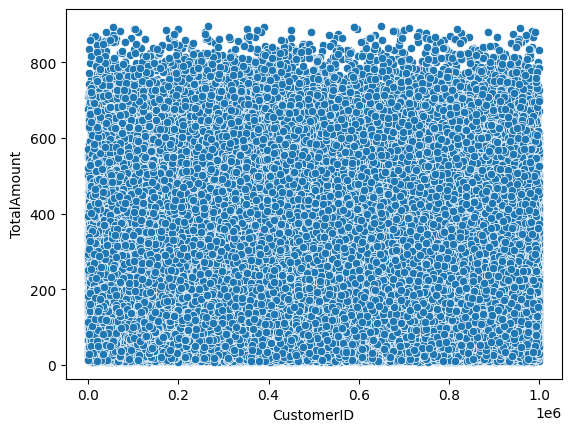

       CustomerID  Quantity      Price   TransactionDate PaymentMethod  \
52097      649087         9  99.815185   7/27/2023 13:40    Debit Card   
97808      266635         9  99.618873   4/11/2024 22:47   Credit Card   
97083      590301         9  99.908285   10/9/2023 10:09    Debit Card   
30448      590260         9  99.552733    11/9/2023 1:51    Debit Card   
41342       55183         9  99.644161    7/17/2023 1:04          Cash   
79012      388796         9  99.507283    2/10/2024 0:40          Cash   
63287      957063         9  99.543715   1/18/2024 21:50          Cash   
95654      711672         9  99.895499    3/2/2024 13:22    Debit Card   
76294      199840         9  99.538757    4/17/2024 9:14   Credit Card   
85923      103767         9  99.168399  11/16/2023 12:58    Debit Card   
61833      102278         9  98.834101   7/28/2023 19:36   Credit Card   
43967      817883         9  99.212723   2/24/2024 14:47    Debit Card   
7612       352490         9  99.136185

In [ ]:
import pandas as pd
df = pd.read_csv('Retail_Transaction_Dataset.csv')
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

#Data Vis
#histplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['TotalAmount'])
plt.title('Total Amount Distribution')
plt.show()

#Numerical variables for the heatmap
num_vars = df.drop(columns=['CustomerID']).select_dtypes(include={'number'})
sns.heatmap(num_vars)
plt.show()

plt.hist(df['DiscountApplied(%)'], bins = 20)
plt.show()

print(df['StoreLocation'].unique())

#One hot encoding
print(df['ProductCategory'].unique())
one_hot_encoder = pd.get_dummies(df['ProductCategory'])
df_encoded = pd.concat([df, one_hot_encoder], axis = 1)
print(df_encoded)

prod_df = df.drop(columns = ['ProductID'])
encoded_df = pd.concat([prod_df, one_hot_encoder], axis = 1)

# Ensure 'TransactionDate' is in datetime format
prod_df['TransactionDate'] = pd.to_datetime(prod_df['TransactionDate'])

# Extract month from 'TransactionDate'
prod_df['Month'] = prod_df['TransactionDate'].dt.month

# Group by month and sum 'TotalAmount'
spend_by_month = prod_df.groupby('Month')['TotalAmount'].sum()

# Plot the bar chart
plt.bar(spend_by_month.index, spend_by_month.values)
plt.title('Total Spend by Month')
plt.xlabel('Month')
plt.ylabel('Total Spend')
plt.xticks(spend_by_month.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

encoded_df[['Books','Clothing', 'Electronics', 'Home Decor']] = encoded_df[['Books', 'Clothing', 'Electronics', 'Home Decor']].astype(int)
encoded_df = encoded_df.drop(columns=['ProductCategory'])
print(encoded_df)
sns.scatterplot(x = 'CustomerID', y = 'TotalAmount', data = encoded_df)
plt.show()
encoded_sorted = encoded_df.sort_values(by= 'TotalAmount', ascending = False)
print(encoded_sorted.head(30))

In [ ]:
customer_spend = prod_df.groupby('CustomerID')['TotalAmount'].sum()

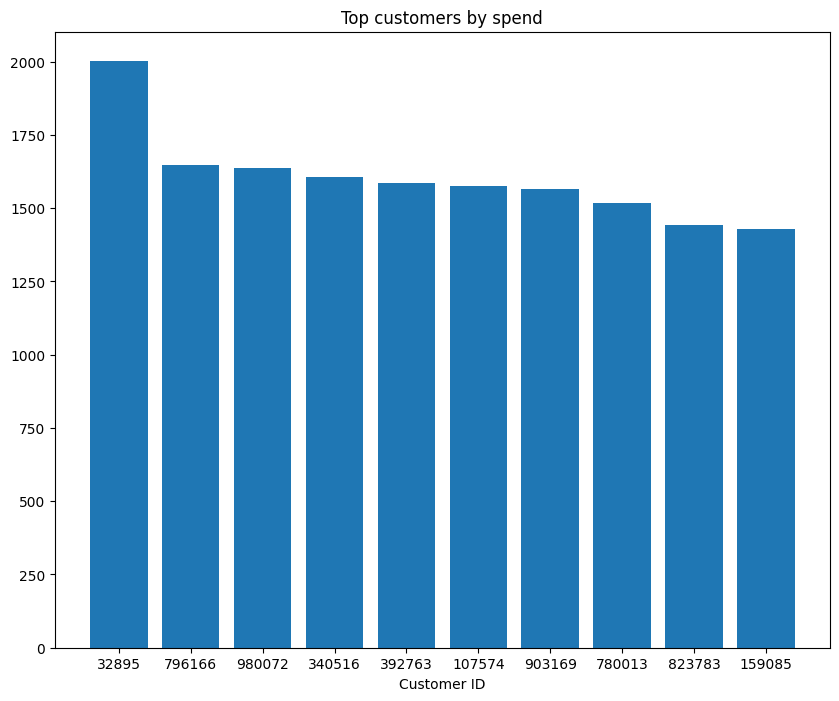

In [ ]:
top_customers = customer_spend.sort_values(ascending = False).head(10)
plt.figure(figsize=(10,8))
plt.bar(top_customers.index.astype(str), top_customers.values)
plt.title('Top customers by spend')
plt.xlabel('Customer ID')
plt.show()

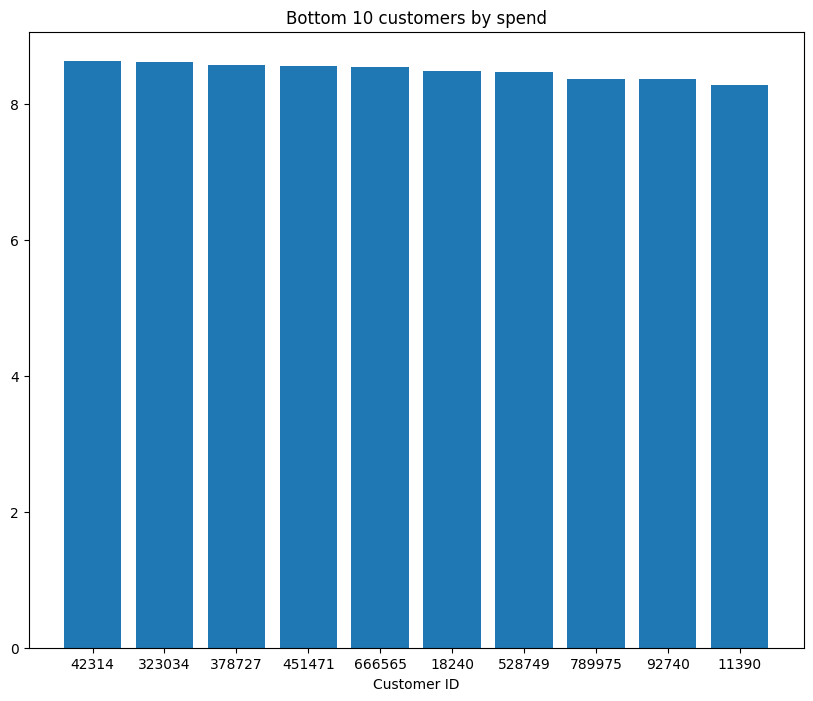

In [ ]:
bottom_customers_spend = prod_df.groupby('CustomerID')['TotalAmount'].sum()
bottom_customers = bottom_customers_spend.sort_values(ascending = False).tail(10)
plt.figure(figsize=(10,8))
plt.bar(bottom_customers.index.astype(str), bottom_customers.values)
plt.title('Bottom 10 customers by spend')
plt.xlabel('Customer ID')
plt.show() 

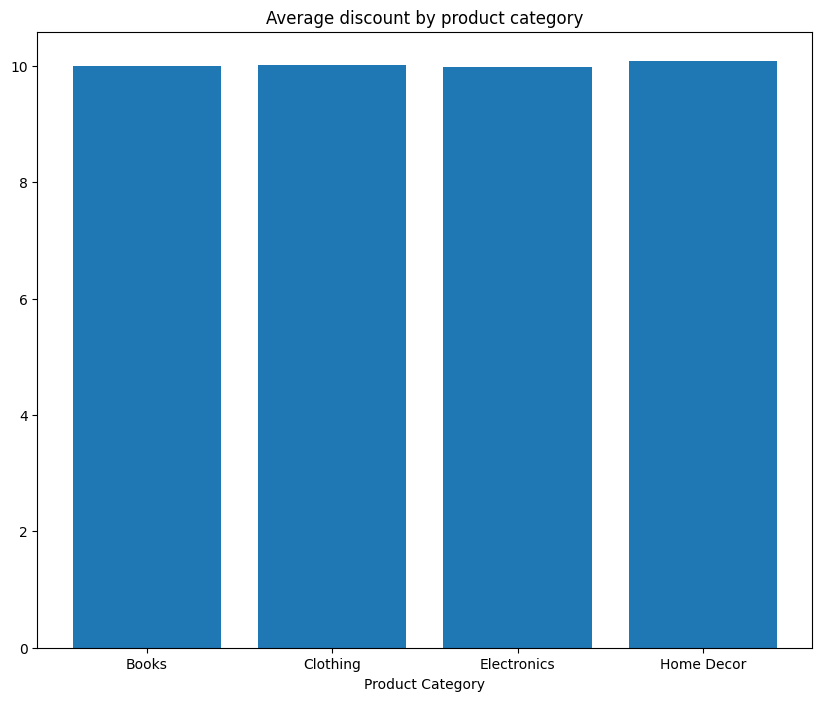

In [ ]:
avg_discount = df.groupby('ProductCategory')['DiscountApplied(%)'].mean()
plt.figure(figsize=(10,8))
plt.bar(avg_discount.index.astype(str), avg_discount.values)
plt.title('Average discount by product category')
plt.xlabel('Product Category')
plt.show()

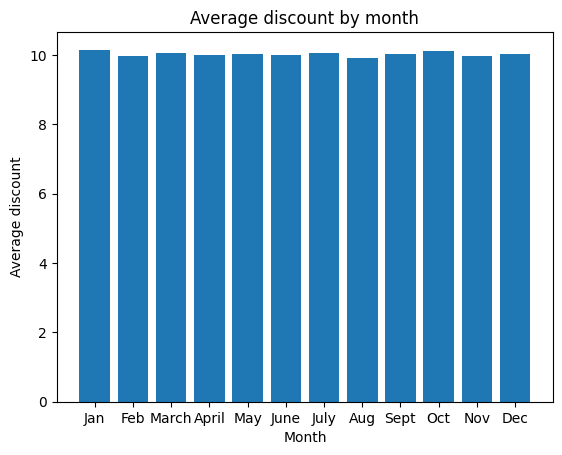

In [ ]:
# Average discount by month
avg_discount_by_month = prod_df.groupby('Month')['DiscountApplied(%)'].mean()
plt.bar(avg_discount_by_month.index, avg_discount_by_month.values)
plt.title('Average discount by month')
plt.xlabel('Month')
plt.ylabel('Average discount')
plt.xticks(avg_discount_by_month.index, ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
plt.show()

In [ ]:
max_discount_by_month = prod_df.groupby('Month')['DiscountApplied(%)'].max()
mean_discount_by_month = prod_df.groupby('Month')['DiscountApplied(%)'].mean()
max_spend_in_month = prod_df.groupby('Month')['TotalAmount'].mean()
monthly_sales = prod_df.groupby('Month')['TotalAmount'].sum()
highest_sales_month = monthly_sales.sort_values(ascending = False).head()
print("Max Discounts in months: ", max_discount_by_month)
print("Average discount in months: ", mean_discount_by_month)
print("Maximum spend in month: ", max_spend_in_month)
print("Highest sales months: ", highest_sales_month)

Max Discounts in months:  Month
1     19.997788
2     19.997643
3     19.998331
4     19.998052
5     19.998216
6     19.997594
7     19.997954
8     19.997497
9     19.996764
10    19.999555
11    19.998261
12    19.999585
Name: DiscountApplied(%), dtype: float64
Average discount in months:  Month
1     10.147000
2      9.973286
3     10.053539
4      9.996071
5     10.009506
6     10.006307
7     10.039730
8      9.904568
9     10.031502
10    10.102303
11     9.952264
12    10.021024
Name: DiscountApplied(%), dtype: float64
Maximum spend in month:  Month
1     249.133241
2     244.323194
3     249.290297
4     244.816351
5     250.307117
6     250.681163
7     248.057522
8     248.217539
9     250.621513
10    246.180264
11    247.201410
12    250.873488
Name: TotalAmount, dtype: float64
Highest sales months:  Month
7     2.132551e+06
1     2.128345e+06
12    2.125651e+06
8     2.109353e+06
3     2.108248e+06
Name: TotalAmount, dtype: float64


In [ ]:
print("Sales by months: ", monthly_sales)

Sales by months:  Month
1     2.128345e+06
2     1.973154e+06
3     2.108248e+06
4     1.939190e+06
5     2.099576e+06
6     2.066365e+06
7     2.132551e+06
8     2.109353e+06
9     2.050335e+06
10    2.049451e+06
11    2.051277e+06
12    2.125651e+06
Name: TotalAmount, dtype: float64


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
print("Sales by months: ", monthly_sales)

Sales by months:  Month
1    2,128,345.28
2    1,973,154.12
3    2,108,248.04
4    1,939,190.32
5    2,099,576.10
6    2,066,364.82
7    2,132,550.52
8    2,109,352.65
9    2,050,334.60
10   2,049,450.70
11   2,051,277.30
12   2,125,651.07
Name: TotalAmount, dtype: float64


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
print("Sales by months: ", monthly_sales.sort_values(ascending = False))

Sales by months:  Month
7    2,132,550.52
1    2,128,345.28
12   2,125,651.07
8    2,109,352.65
3    2,108,248.04
5    2,099,576.10
6    2,066,364.82
11   2,051,277.30
9    2,050,334.60
10   2,049,450.70
2    1,973,154.12
4    1,939,190.32
Name: TotalAmount, dtype: float64


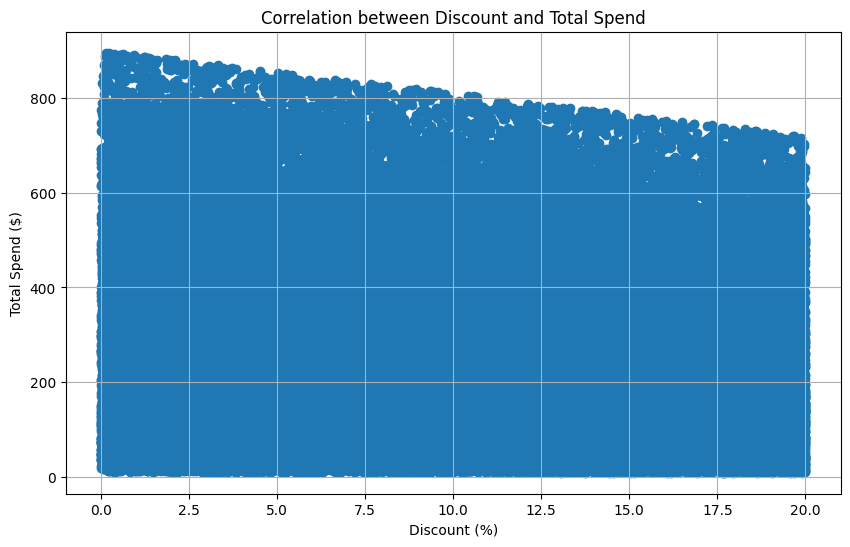

In [ ]:
# Scatter plot of Discount vs. Total Spend
plt.figure(figsize=(10, 6))
plt.scatter(df['DiscountApplied(%)'], df['TotalAmount'])
plt.title('Correlation between Discount and Total Spend')
plt.xlabel('Discount (%)')
plt.ylabel('Total Spend ($)')
plt.grid(True)
plt.show()

In [ ]:
df.columns

Index(['CustomerID', 'ProductID', 'Quantity', 'Price', 'TransactionDate',
       'PaymentMethod', 'StoreLocation', 'ProductCategory',
       'DiscountApplied(%)', 'TotalAmount'],
      dtype='object')

In [ ]:
# Sales by store location
store_location_sales = df.groupby('StoreLocation')['TotalAmount'].sum()
store_location_sales

StoreLocation
000 Alexander Spurs\nRothtown, IL 35945              185.32
000 Allen Rue\nKiddstad, MS 61368                     54.40
000 Ashley Camp Suite 144\nWest Natasha, SC 03524     64.09
000 Bennett Mountains Apt. 210\nLevifort, ME 61462    68.49
000 Carpenter Curve\nEast Brett, AS 53903            146.99
                                                      ...  
Unit 9983 Box 8478\nDPO AA 68111                     156.73
Unit 9986 Box 8172\nDPO AP 21999                     126.59
Unit 9989 Box 6060\nDPO AE 61725                     228.19
Unit 9998 Box 1568\nDPO AA 59676                      90.97
Unit 9999 Box 0761\nDPO AE 02129                     341.16
Name: TotalAmount, Length: 100000, dtype: float64

In [ ]:
df['StoreLocation'].unique()

array(['176 Andrew Cliffs\nBaileyfort, HI 93354',
       '11635 William Well Suite 809\nEast Kara, MT 19483',
       '910 Mendez Ville Suite 909\nPort Lauraland, MO 99563', ...,
       '50653 Kara Lakes\nStephanieborough, RI 94492',
       '18756 Mcfarland Way Suite 866\nBarnettside, PR 50529',
       '8046 Hull Drive\nPaulstad, GU 87218'], dtype=object)

In [ ]:
total_sales_in_stores = store_location_sales.sum()
print("Total sales in stores : "(total_sales_in_stores))

<>:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<>:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
<ipython-input-23-62f2b0acb7a3>:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  print("Total sales in stores : "(total_sales_in_stores))
<ipython-input-23-62f2b0acb7a3>:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  print("Total sales in stores : "(total_sales_in_stores))
<ipython-input-23-62f2b0acb7a3>:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  print("Total sales in stores : "(total_sales_in_stores))
<ipython-input-23-62f2b0acb7a3>:2: SyntaxWarning: 'str' object is not callable; perhaps you missed a comma?
  print("Total sales in stores : "(total_sales_in_stores))


TypeError: 'str' object is not callable

In [ ]:
total_sales_in_stores

24833495.506385516

In [ ]:
# Sales by store location
store_location_sales = df.groupby('StoreLocation')['TotalAmount'].sum().reset_index()
print(store_location_sales)

                                           StoreLocation  TotalAmount
0                000 Alexander Spurs\nRothtown, IL 35945       185.32
1                      000 Allen Rue\nKiddstad, MS 61368        54.40
2      000 Ashley Camp Suite 144\nWest Natasha, SC 03524        64.09
3      000 Bennett Mountains Apt. 210\nLevifort, ME 6...        68.49
4              000 Carpenter Curve\nEast Brett, AS 53903       146.99
...                                                  ...          ...
99995                   Unit 9983 Box 8478\nDPO AA 68111       156.73
99996                   Unit 9986 Box 8172\nDPO AP 21999       126.59
99997                   Unit 9989 Box 6060\nDPO AE 61725       228.19
99998                   Unit 9998 Box 1568\nDPO AA 59676        90.97
99999                   Unit 9999 Box 0761\nDPO AE 02129       341.16

[100000 rows x 2 columns]
